<a href="https://colab.research.google.com/github/khaophuthaipch/EAI6000/blob/master/PimKhaophuthai_Week3_Lab_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pimchanok Khaophuthai
# EAI6000
# Mar 7, 2020

In this lab we will train a neural network model to classify images of clothing. 

The lab is designed to be run using Google Colab, but also can be run as a normal jupyter notebook with minor modifications.

This lab uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## Import the Fashion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Examine the dataset size.
1. What are the sizes of each image? 
2. How many categories are there?
3. How many images are there in the test and training sets?
4. What are the range of values for the images? 

In [4]:
# Size of the image 
train_images.shape

(60000, 28, 28)

In [5]:
# Number of categories with count of samples in each category
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [6]:
# Number of images in the test and train dataset
print(f"There are {train_labels.size} images in the train data set")
print(f"There are {test_labels.size} images in the test data set")

There are 60000 images in the train data set
There are 10000 images in the test data set


In [7]:
print(f'The range of values for the images if from {train_images.min()} to {train_images.max()}')

The range of values for the images if from 0 to 255


Preprocess the data by scaling the pixel values of all images to fall between 0 and 1.

In [8]:
# Check the type of the data
train_images.dtype

dtype('uint8')

In [9]:
# Scaling the pizel values by divinding the pixels values by the largest value = 255
train_images = train_images.astype('float')
train_images /= 255.0
print(f'The range of values for the train images is from {train_images.min()} to {train_images.max()}')

The range of values for the train images is from 0.0 to 1.0


In [10]:
# Scaling the pizel values by divinding the pixels values by the largest value = 255
test_images = test_images.astype('float')
test_images /= 255.0
print(f'The range of values for the test images is from {test_images.min()} to {test_images.max()}')

The range of values for the test images is from 0.0 to 1.0


To verify that the data is in the correct format  display the first 10 images from the *training set* and display the class name below each image.


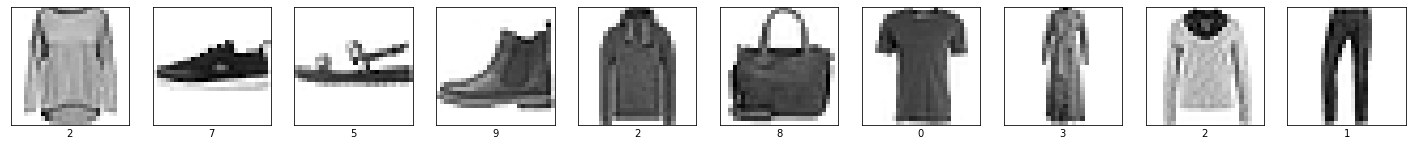

In [11]:
import matplotlib.pyplot as plt
from random import randint
fig, axes = plt.subplots(1, 10,  figsize=(25, 25))
for i in range(10):
    n = randint(0,60000)
    axes[i].imshow(train_images[n], cmap = plt.cm.gray_r)
    axes[i].set_xlabel((train_labels[n]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

    

## Build the model

Using Keras, build a neural network with a single hidden layer consisting of 64 neurons. Remember that you will either have to reshape the image data into 1D vectors, or use a flatten layer at the input.
1. Set up the model layers
2. Compile the model 
3. Print the model summary

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Set up model layers
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [0]:
# Compile the model
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'], optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Train the model

Train the model on the training images for 20 epochs.




In [15]:
model_trained = model.fit(train_images, train_labels, batch_size = 128, epochs=20, verbose = 2, validation_data= (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 2s - loss: 0.5895 - accuracy: 0.8011 - val_loss: 0.4775 - val_accuracy: 0.8337
Epoch 2/20
60000/60000 - 2s - loss: 0.4290 - accuracy: 0.8507 - val_loss: 0.4352 - val_accuracy: 0.8505
Epoch 3/20
60000/60000 - 2s - loss: 0.3881 - accuracy: 0.8639 - val_loss: 0.4225 - val_accuracy: 0.8513
Epoch 4/20
60000/60000 - 2s - loss: 0.3641 - accuracy: 0.8717 - val_loss: 0.4111 - val_accuracy: 0.8533
Epoch 5/20
60000/60000 - 2s - loss: 0.3459 - accuracy: 0.8778 - val_loss: 0.3878 - val_accuracy: 0.8608
Epoch 6/20
60000/60000 - 2s - loss: 0.3299 - accuracy: 0.8822 - val_loss: 0.3773 - val_accuracy: 0.8645
Epoch 7/20
60000/60000 - 2s - loss: 0.3193 - accuracy: 0.8856 - val_loss: 0.3702 - val_accuracy: 0.8682
Epoch 8/20
60000/60000 - 2s - loss: 0.3100 - accuracy: 0.8885 - val_loss: 0.3723 - val_accuracy: 0.8650
Epoch 9/20
60000/60000 - 2s - loss: 0.2994 - accuracy: 0.8916 - val_loss: 0.3674 - val_accuracy: 0.8687
Epoch 10/20
60

Evaluate the accuracy of the model on the test dataset. How does it compare with the training accuracy? Is it likely overfitting or underfitting?

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 1s - loss: 0.3372 - accuracy: 0.8814


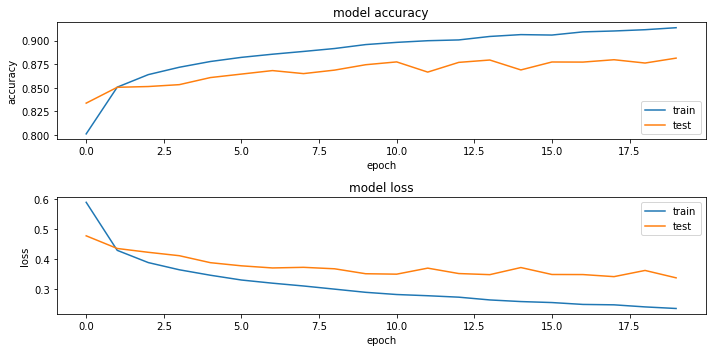

In [17]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(model_trained.history['accuracy'])
plt.plot(model_trained.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_trained.history['loss'])
plt.plot(model_trained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

### Make predictions

The outputs layer of the model contains predictions about the classification for each image. 

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
class_predictions = model.predict_classes(test_images)
prediction_probabilities = probability_model.predict(test_images)


Examine the shape of the variable 'prediction_probabilities'. How is it different from class_predictions? What do the dimensions correspond to?

In [19]:
class_predictions.shape

(10000,)

In [20]:
prediction_probabilities.shape

(10000, 10)

Class predictions is the class prediction where it indicates what class the sample belongs. Prediciton probabilities is the predicted probabilities that represents the model's confidence that the image corresponds each class. Therefore, the shape is 10000, 10 where 10 is 10 classes.

The following functions plot the image and a bar graph of the predicted probabilities. Using these functions, make a plot of the first 25 test images that were incorrectly classified along with their predicted probabilities. Interpret these images - what sort of images tend to be misclassified?

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(np.arange(10),list(class_names),rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
# misclassified 
misclassified = [x for t in np.where(test_labels != class_predictions) for x in t]

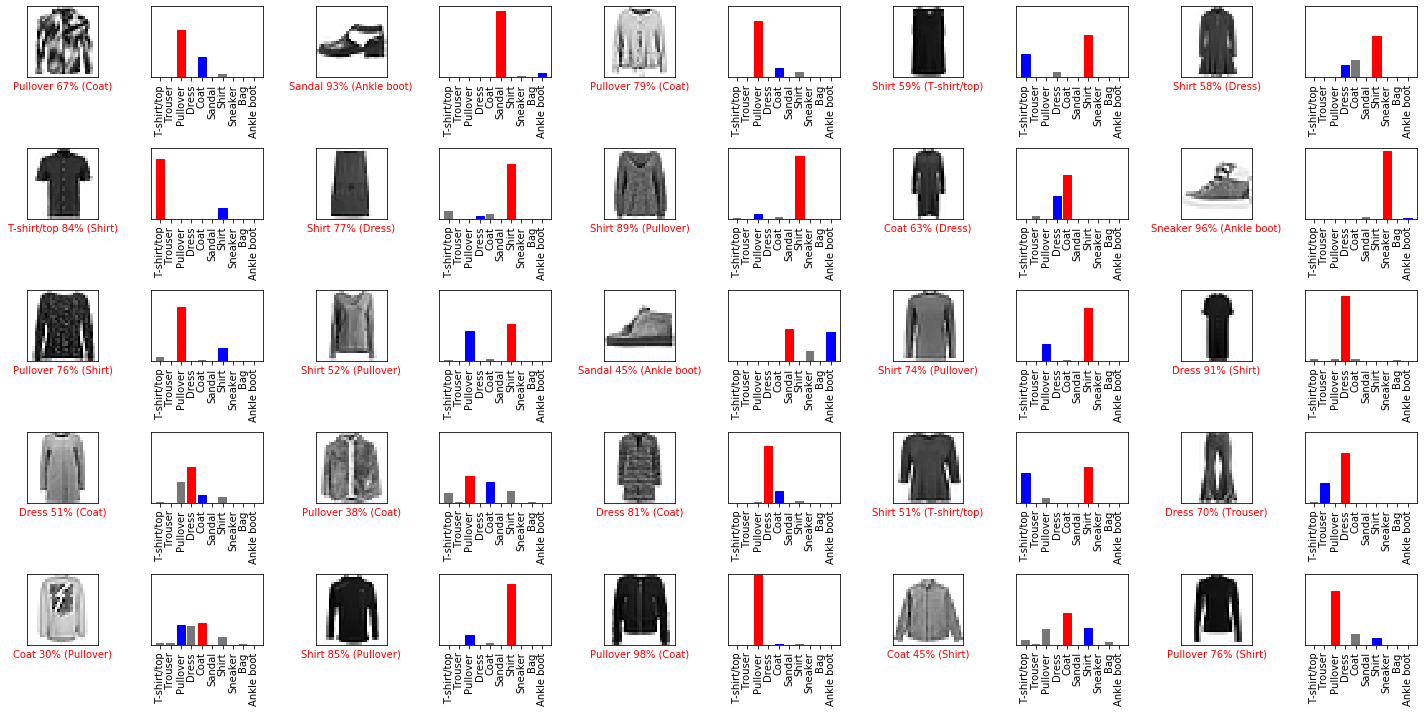

In [23]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(misclassified[i], prediction_probabilities[misclassified[:25]][i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(misclassified[i], prediction_probabilities[misclassified[:25]][i], test_labels)
plt.tight_layout()
plt.show()

Plot a confusion matrix of the predictions. Which misclassifications are the most common?

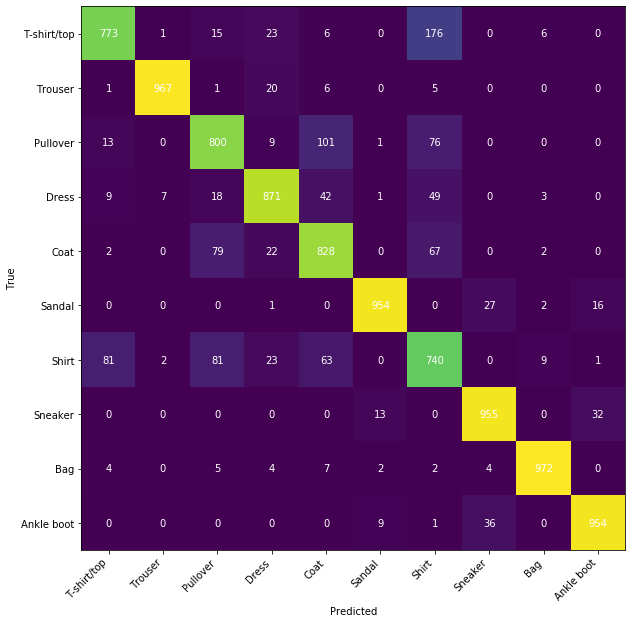

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,class_predictions)
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(class_names, rotation=45, ha="right")
ax.set_yticklabels(class_names)
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

Tops including T-shirt/top, Pullover, Dress, Coat and Shirt are oftten misclassified. A lot of shirt is classified as T-shirt and vice versa. A lot of coat is classified as pullover. 